# Hands-on Exercise for CLUS Module


### 0. Setting up necessary packages and creating data 

In [1]:
!pip install --user scikit-learn --upgrade

Traceback (most recent call last):
  File "C:\Users\15139\Anaconda3\Scripts\pip-script.py", line 10, in <module>
    sys.exit(main())
TypeError: 'module' object is not callable


Import necessary packages

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



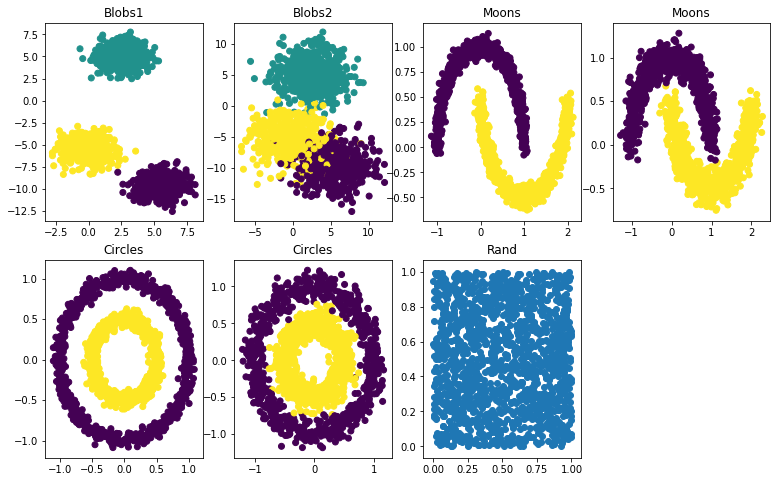

In [122]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [18]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [19]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [54]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br /> K Means focusses on minimizing the Sum of squared errors which is easier with globular datasets. KMeans is expected to work well with Blobs datasets

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
<br /> K Means is not very efficient with randomly shaped datasets as they increase the value of SSE. K Means does not work very well with Circles dataset as the two visible clusters are overlapping


<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span><br /> K means worked well with Blobs datasets followed by Moons and Circles



In [277]:
n_clusters = 3
#random_state = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);

Cluster Labels for Blobs1 data: [2 1 1 ... 1 1 1]
K-Means Score for Blobs1 data:  2875.5754608105485


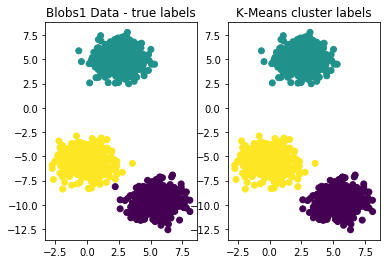

In [278]:
#Blobs_1:
y_pred_k_blobs1 = kmeans.fit_predict(Blobs1_X)
print("Cluster Labels for Blobs1 data:",y_pred_k_blobs1)
score_blobs1 = -kmeans.score(Blobs1_X)
print("K-Means Score for Blobs1 data: ", score_blobs1)


fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_k_blobs1)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

Cluster Labels for Blobs2 data: [2 1 1 ... 1 1 1]
K-Means Score for Blobs2 data:  16414.2674115897


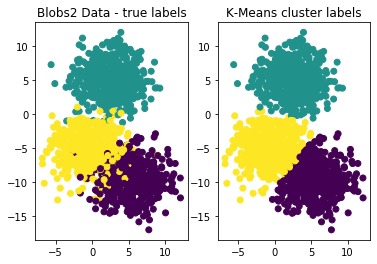

In [279]:
#Blobs2:
y_pred_k_blobs2 = kmeans.fit_predict(Blobs2_X)
print("Cluster Labels for Blobs2 data:",y_pred_k_blobs2)
score_Blobs2 = -kmeans.score(Blobs2_X)
print("K-Means Score for Blobs2 data: ", score_Blobs2)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y) # true clusters
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_k_blobs2)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

In [280]:
n_clusters = 2
random_state = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);

Cluster Labels for Moons1 data: [0 1 1 ... 0 1 1]
K-Means Score for Moons1 data:  601.2025348798403


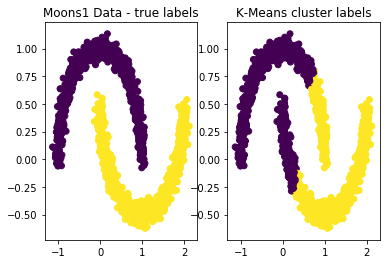

In [281]:
#Moons1:
y_pred_k_Moons1 = kmeans.fit_predict(Moons1_X)
print("Cluster Labels for Moons1 data:",y_pred_k_Moons1)
score_Moons1 = -kmeans.score(Moons1_X)
print("K-Means Score for Moons1 data: ", score_Moons1)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y) # true clusters
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_k_Moons1)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

Cluster Labels for Moons2 data: [0 1 1 ... 0 1 1]
K-Means Score for Moons2 data:  616.0456903326541


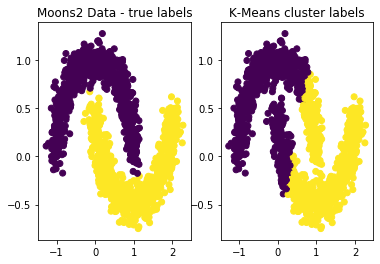

In [282]:
#Moons2:
y_pred_k_Moons2 = kmeans.fit_predict(Moons2_X)
print("Cluster Labels for Moons2 data:",y_pred_k_Moons2)
score_Moons2 = -kmeans.score(Moons2_X)
print("K-Means Score for Moons2 data: ", score_Moons2)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y) # true clusters
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_k_Moons2)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

Cluster Labels for Circles1 data: [0 0 1 ... 1 1 1]
K-Means Score for Circles1 data:  598.020543255273


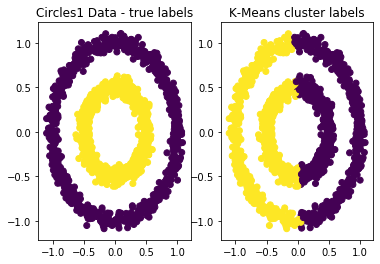

In [283]:
#Circles1:
y_pred_k_Circles1 = kmeans.fit_predict(Circles1_X)
print("Cluster Labels for Circles1 data:",y_pred_k_Circles1)
score_Circles1 = -kmeans.score(Circles1_X)
print("K-Means Score for Circles1 data: ", score_Circles1)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y) # true clusters
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_k_Circles1)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

Cluster Labels for Circles2 data: [0 0 1 ... 1 1 1]
K-Means Score for Circles2 data:  611.2805756529305


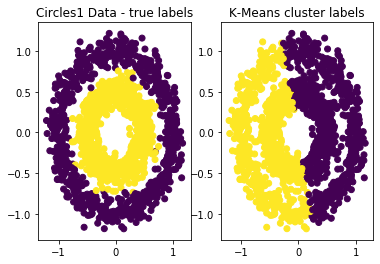

In [284]:
#Circles2:
y_pred_k_Circles2 = kmeans.fit_predict(Circles2_X)
print("Cluster Labels for Circles2 data:",y_pred_k_Circles2)
score_Circles2 = -kmeans.score(Circles2_X)
print("K-Means Score for Circles2 data: ", score_Circles2)

fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y) # true clusters
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_k_Circles2)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span>
<br /> Decreasing order of Rand_Index: <br />Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1


In [139]:
print("Blobs1 rand_index:", rand_index(Blobs1_y, y_pred_k_blobs1))
print("Blobs2 rand_index:", rand_index(Blobs2_y, y_pred_k_blobs2))
print("Moons1 rand_index:", rand_index(Moons1_y, y_pred_k_Moons1))
print("Moons2 rand_index:", rand_index(Moons2_y, y_pred_k_Moons2))
print("Circles1 rand_index:", rand_index(Circles1_y, y_pred_k_Circles1))
print("Circles2 rand_index:", rand_index(Circles2_y, y_pred_k_Circles2))

Blobs1 rand_index: 0.99911140760507
Blobs2 rand_index: 0.9207142539470758
Moons1 rand_index: 0.6201236379808761
Moons2 rand_index: 0.6240836112964199
Circles1 rand_index: 0.4996744496330887
Circles2 rand_index: 0.4996806760062264


<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span><br /> The rankings are consistent with my findings as K means works well with globular datasets better as compared to overlapping datapoints which has high SSE



### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
<br /> Single link cluster focusses on the least distance between the points in different clusters. Hence it is expected to work well with Circles and Moons datasets


<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br /> Single link clustering may not work too well with Blobs datasets or the datasets with high variance among the points. Hence, Blobs2 might have least efficient clustering using Single link method



<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

In [40]:
n_clusters = 3
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)

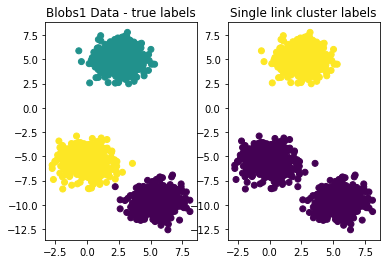

In [55]:
#Blobs1
y_pred_Blobs1 = single_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_Blobs1)
plt.title('Single link cluster labels')
plt.show()

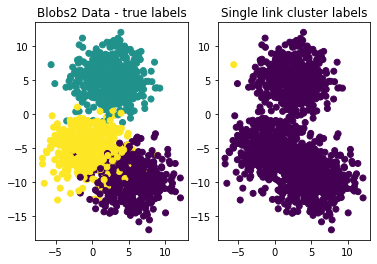

In [56]:
#Blobs2
y_pred_Blobs2 = single_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_Blobs2)
plt.title('Single link cluster labels')
plt.show()

In [43]:
n_clusters = 2
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)

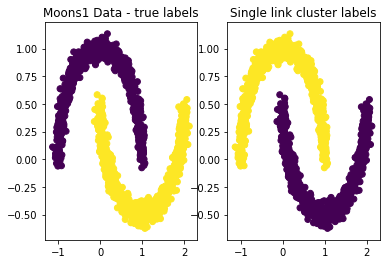

In [57]:
#Moons1
y_pred_Moons1 = single_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_Moons1)
plt.title('Single link cluster labels')
plt.show()

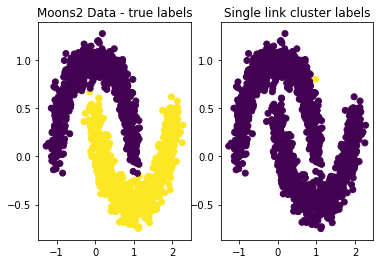

In [58]:
#Moons2
y_pred_Moons2 = single_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_Moons2)
plt.title('Single link cluster labels')
plt.show()

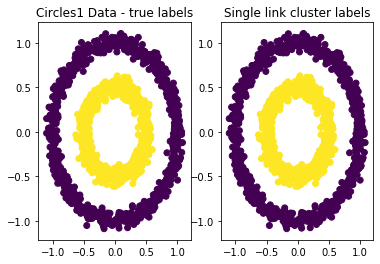

In [59]:
#Circles1
y_pred_Circles1 = single_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_Circles1)
plt.title('Single link cluster labels')
plt.show()

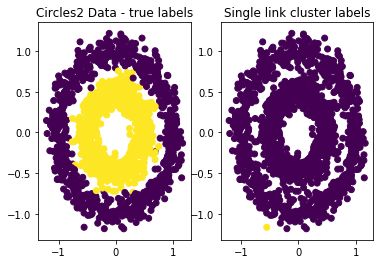

In [60]:
#Circles2
y_pred_Circles2 = single_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_Circles2)
plt.title('Single link cluster labels')
plt.show()

<span style="color:green">**Answer:** </span>
Based on the visualisation of true labels and cluster labels, it can be observed that Single link clustering works well on 
datasets with low standard deviation as opposed to datasets with high standard deviation. <br />

Among the available datasets, best performance of single-link clustering is observed on Circles1 data as both true labels and cluster labels are the same.<br />

Decreasing order of performance:(best to worst)<br />
{Circles1, Moons1} > {Blobs1 (well seperated but can be further clustered)} > {(Blobs2, Moons2, Circles2(only one clusters deduced)}

<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span> <br /> Datasets in the decreasing order of Rand-Index scores: <br />
Circles1, Moons1 > Blobs1 > Circles2, Moons2 > Blobs2



In [67]:
print("Blobs1 rand_index:", rand_index(Blobs1_y, y_pred_Blobs1))
print("Blobs2 rand_index:", rand_index(Blobs2_y, y_pred_Blobs2))
print("Moons1 rand_index:", rand_index(Moons1_y, y_pred_Moons1))
print("Moons2 rand_index:", rand_index(Moons2_y, y_pred_Moons2))
print("Circles1 rand_index:", rand_index(Circles1_y, y_pred_Circles1))
print("Circles2 rand_index:", rand_index(Circles2_y, y_pred_Circles2))

Blobs1 rand_index: 0.77762953079831
Blobs2 rand_index: 0.33333422281521013
Moons1 rand_index: 1.0
Moons2 rand_index: 0.49966733377807426
Circles1 rand_index: 1.0
Circles2 rand_index: 0.49966733377807426


<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> The rankings in 2c are consistent with the rand index values found for each of the datasets


### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br /> Complete link clustering focusses on the maximum distance between the farthest points in the dataset. Hence it is expeceted to work well with blobs dataset



<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
<br /> Complete link clustering might not work very well with circles data as the datapoints from two visible clusters are close to one another and complete link method focusses on the maximum distance between the datapoints


<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span><br /> Decreasing order of performance(best to worst)<br />Blobs1 > Blobs2 > Moons and Circles. Going by the figures, it can be seen that this clustering worked well just with Blobs dataset



In [69]:
n_clusters = 3
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)

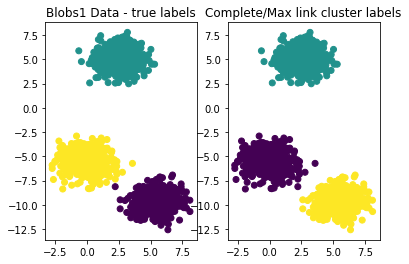

In [70]:
#Blobs1
y_pred_max_Blobs1 = complete_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_max_Blobs1)
plt.title('Complete/Max link cluster labels')
plt.show()

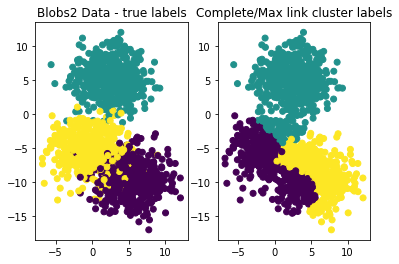

In [71]:
#Blobs2
y_pred_max_Blobs2 = complete_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_max_Blobs2)
plt.title('Complete/Max link cluster labels')
plt.show()

In [72]:
n_clusters = 2
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)

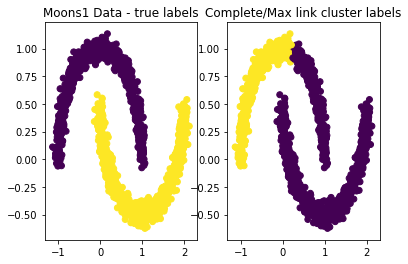

In [73]:
#Moons1
y_pred_max_Moons1 = complete_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_max_Moons1)
plt.title('Complete/Max link cluster labels')
plt.show()

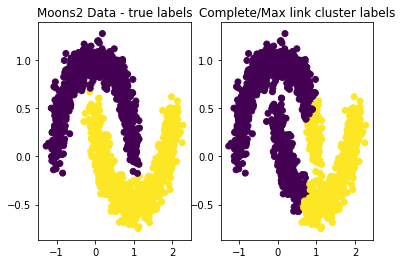

In [74]:
#Moons2
y_pred_max_Moons2 = complete_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_max_Moons2)
plt.title('Complete/Max link cluster labels')
plt.show()

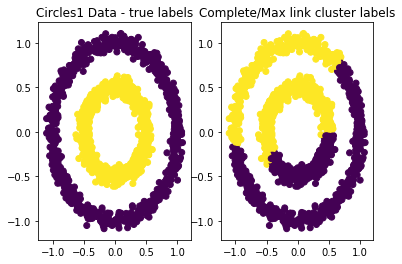

In [75]:
#Circles1
y_pred_max_Circles1 = complete_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_max_Circles1)
plt.title('Complete/Max link cluster labels')
plt.show()

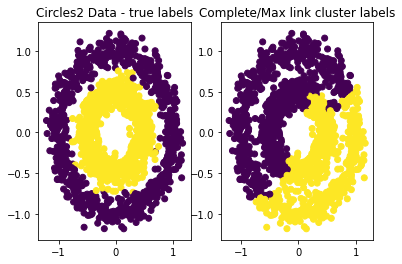

In [76]:
#Circles2
y_pred_max_Circles2 = complete_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_max_Circles2)
plt.title('Complete/Max link cluster labels')
plt.show()

<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [77]:
print("Blobs1 rand_index:", rand_index(Blobs1_y, y_pred_max_Blobs1))
print("Blobs2 rand_index:", rand_index(Blobs2_y, y_pred_max_Blobs2))
print("Moons1 rand_index:", rand_index(Moons1_y, y_pred_max_Moons1))
print("Moons2 rand_index:", rand_index(Moons2_y, y_pred_max_Moons2))
print("Circles1 rand_index:", rand_index(Circles1_y, y_pred_max_Circles1))
print("Circles2 rand_index:", rand_index(Circles2_y, y_pred_max_Circles2))

Blobs1 rand_index: 0.99911140760507
Blobs2 rand_index: 0.7736544362908606
Moons1 rand_index: 0.662605292417167
Moons2 rand_index: 0.5965310206804536
Circles1 rand_index: 0.5218714698688014
Circles2 rand_index: 0.5000587058038692


<span style="color:green">**Answer:** </span><br /> 
Decreasing order of Rand_index: <br />
Blobs1 > Blobs2 > Moons1 > Moons2 > Circles1 > Circles2



<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span><br /> Yes, the rankings are consistent as rand index was clearly high for Blobs datasets compared to Moons and Circles datasets



### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br /> Average link agglomerative clustering focusses on finding the clusters based on the average of the pairwise distance between the points in the clusters. It is likely to work well with Blobs datasets as the visible clusters in it are well separated without much overlap



<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br /> Average link clustering might not work well with embedded clusters as calculating the average distance between the points could be affected. Hence it might not work well with Circles datasets 



<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span><br /> By observation, it can be seen that the average link clustering worked well with Blobs1 dataset as it created three well separated clusters followed by Blobs2 and Moons datasets. It didn't work well with Circles datasets



In [87]:
n_clusters = 3
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)

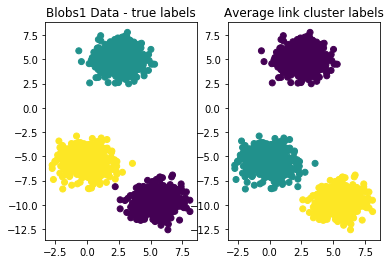

In [88]:
#Blobs1
y_pred_avg_Blobs1 = average_linkage.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_avg_Blobs1)
plt.title('Average link cluster labels')
plt.show()

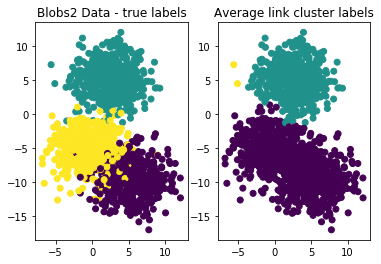

In [89]:
#Blobs2
y_pred_avg_Blobs2 = average_linkage.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_avg_Blobs2)
plt.title('Average link cluster labels')
plt.show()

In [90]:
n_clusters = 2
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)

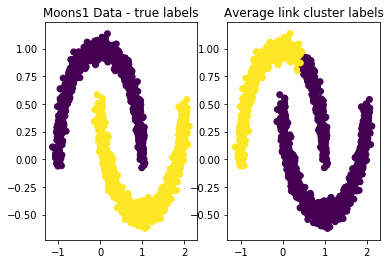

In [91]:
#Moons1
y_pred_avg_Moons1 = average_linkage.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_avg_Moons1)
plt.title('Average link cluster labels')
plt.show()

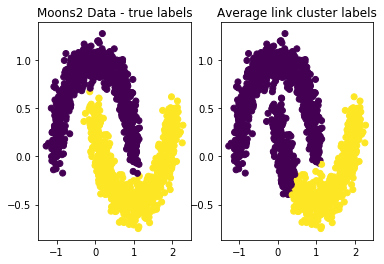

In [92]:
#Moons2
y_pred_avg_Moons2 = average_linkage.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_avg_Moons2)
plt.title('Average link cluster labels')
plt.show()

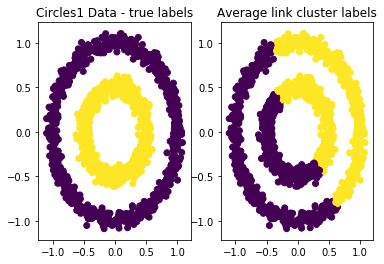

In [93]:
#Circles1
y_pred_avg_Circles1 = average_linkage.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_avg_Circles1)
plt.title('Average link cluster labels')
plt.show()

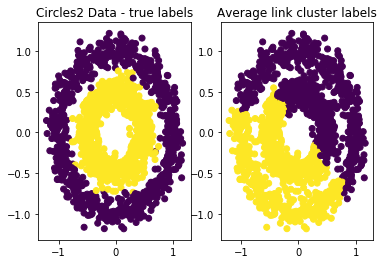

In [94]:
#Circles2
y_pred_avg_Circles2 = average_linkage.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_avg_Circles2)
plt.title('Average link cluster labels')
plt.show()

<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span><br />
Decreasing order of Rand Index: <br />
Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1



In [95]:
print("Blobs1 rand_index:", rand_index(Blobs1_y, y_pred_avg_Blobs1))
print("Blobs2 rand_index:", rand_index(Blobs2_y, y_pred_avg_Blobs2))
print("Moons1 rand_index:", rand_index(Moons1_y, y_pred_avg_Moons1))
print("Moons2 rand_index:", rand_index(Moons2_y, y_pred_avg_Moons2))
print("Circles1 rand_index:", rand_index(Circles1_y, y_pred_avg_Circles1))
print("Circles2 rand_index:", rand_index(Circles2_y, y_pred_avg_Circles2))

Blobs1 rand_index: 0.99911140760507
Blobs2 rand_index: 0.7636575494774294
Moons1 rand_index: 0.7132310429175005
Moons2 rand_index: 0.7457647320435846
Circles1 rand_index: 0.500414498554592
Circles2 rand_index: 0.5050780520346898


<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
<br /> Yes, the rankings are consistent as the rand_index was found to be maximum for Blobs1 dataset followed by Blobs2, Moons and Circles dataset


### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br />DBSCAN algorithm focusses on local density of points rather than the distance between the points. Therefore, it works well with non-globular datasets too. Based on the value of eps and min_samples choosen, the algorithm can work well with low intra cluster variance datasets like Blobs1, Moons1 and Circles1



<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br />The algorithm might not be as efficient with Blobs2, moons2 and Circles2 as they have high intra cluster visible variance




<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span><br /> Based on the value of eps and min_samples chosen, it could be observed that DBSCAN worked well with Blobs1, Moons1 and Circles1 datasets followed by Moons2 and Circles2. Different values of eps and min_samples couldn't cluster the the dataset Blobs2 effectively. Also, Blobs2 had high number of noise points compared to others



In [5]:
dbscan = DBSCAN(eps=1.3, min_samples=10)
y_pred_db_Blobs1 = dbscan.fit_predict(Blobs1_X)
np.sum(y_pred_db_Blobs1==-1)

0

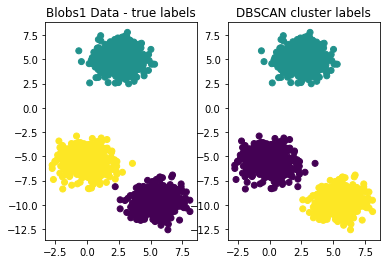

In [6]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_db_Blobs1)
plt.title('DBSCAN cluster labels')
plt.show()

In [199]:
dbscan = DBSCAN(eps=1.07, min_samples=14)
y_pred_db_Blobs2 = dbscan.fit_predict(Blobs2_X)
np.sum(y_pred_db_Blobs2==-1)

150

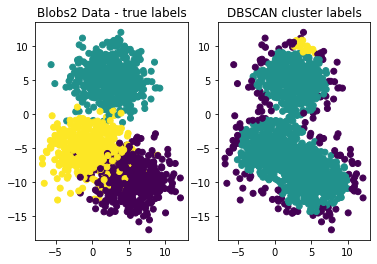

In [200]:
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_db_Blobs2)
plt.title('DBSCAN cluster labels')
plt.show()

In [143]:
dbscan = DBSCAN(eps=.2, min_samples=10)
y_pred_db_Moons1 = dbscan.fit_predict(Moons1_X)
np.sum(y_pred_db_Moons1==-1)

0

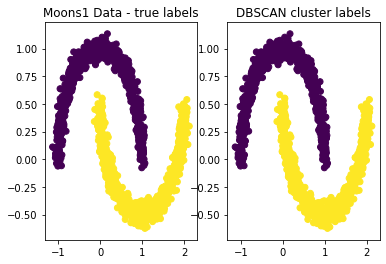

In [144]:
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_db_Moons1)
plt.title('DBSCAN cluster labels')
plt.show()

In [155]:
dbscan = DBSCAN(eps=.12, min_samples=10)
y_pred_db_Moons2 = dbscan.fit_predict(Moons2_X)
np.sum(y_pred_db_Moons2==-1)

14

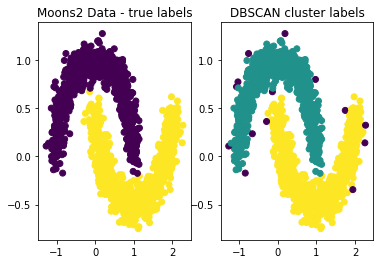

In [156]:
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_db_Moons2)
plt.title('DBSCAN cluster labels')
plt.show()

In [161]:
dbscan = DBSCAN(eps=.1, min_samples=10)
y_pred_db_Circles1 = dbscan.fit_predict(Circles1_X)
np.sum(y_pred_db_Circles1==-1)

0

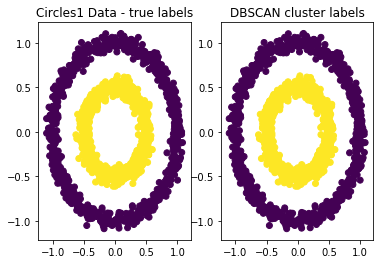

In [162]:
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_db_Circles1)
plt.title('DBSCAN cluster labels')
plt.show()

In [232]:
dbscan = DBSCAN(eps=.12, min_samples=10)
y_pred_db_Circles2 = dbscan.fit_predict(Circles2_X)
np.sum(y_pred_db_Circles2==-1)

14

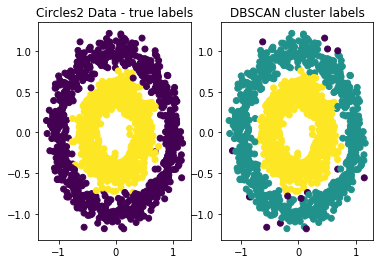

In [233]:
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_db_Circles2)
plt.title('DBSCAN cluster labels')
plt.show()

<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

<span style="color:green">**Answer:** </span> <br />Based on the value of eps and min samples choosed, the DBSCAN algorithm found noise points for each of the datasets.<br />
Blobs1: 0<br />Blobs2: 150<br />Moons1: 0<br />Moons2: 14<br />Circles1: 0<br />Circles2: 0<br />


<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span><br /> Decreasing order of Rand Index(best to worst): <br />Moons1, Circles1, Blobs1  > Moons2 > Circles2 > Blobs2



In [220]:
#y_pred_db_Blobs1 = [item for item in y_pred_db_Blobs1 if item >= 0]
y_pred_db_Blobs1[y_pred_db_Blobs1==-1]=10
print("Blobs1 rand_index:", rand_index(Blobs1_y, y_pred_db_Blobs1))

Blobs1 rand_index: 0.9986684456304202


In [221]:
y_pred_db_Blobs2[y_pred_db_Blobs2==-1]=10
print("Blobs2 rand_index:", rand_index(Blobs2_y, y_pred_db_Blobs2))

Blobs2 rand_index: 0.40137247053591285


In [222]:
y_pred_db_Moons1[y_pred_db_Moons1==-1]=10
print("Moons1 rand_index:", rand_index(Moons1_y, y_pred_db_Moons1))

Moons1 rand_index: 1.0


In [223]:
y_pred_db_Moons2[y_pred_db_Moons2==-1]=10
print("Moons2 rand_index:", rand_index(Moons2_y, y_pred_db_Moons2))

Moons2 rand_index: 0.9907066933511229


In [224]:
y_pred_db_Circles1[y_pred_db_Circles1==-1]=10
print("Circles1 rand_index:", rand_index(Circles1_y, y_pred_db_Circles1))

Circles1 rand_index: 1.0


In [225]:
y_pred_db_Circles2[y_pred_db_Circles2==-1]=10
print("Circles2 rand_index:", rand_index(Circles2_y, y_pred_db_Circles2))

Circles2 rand_index: 0.49966644429619744


<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>The rankings are consistent with the rand_indices calculated above



### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>Spectral clustering generates the eigen values based on the similarity/distance matrix. Hence it is concerned with the distance between the points in the datasets. Therefore, it is expected to work well with Blobs datasets than Moons and Circles.



<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>It might not be very effective on Circles and Moons datasets compared to Blobs



<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

<span style="color:green">**Answer:** </span>
<br /> Spectral clustering worked well on Blobs1 and Blobs2 datasets followed by Moons and Circles datasets


In [167]:
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)

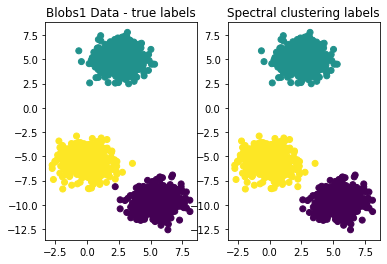

In [168]:
y_pred_spec_Blobs1 = spectral.fit_predict(Blobs1_X)
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred_spec_Blobs1)
plt.title('Spectral clustering labels')
plt.show()

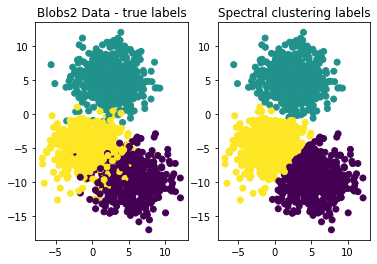

In [169]:
y_pred_spec_Blobs2 = spectral.fit_predict(Blobs2_X)
plt.subplot(1,2,1)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=Blobs2_y)
plt.title('Blobs2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c=y_pred_spec_Blobs2)
plt.title('Spectral clustering labels')
plt.show()

In [170]:
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)

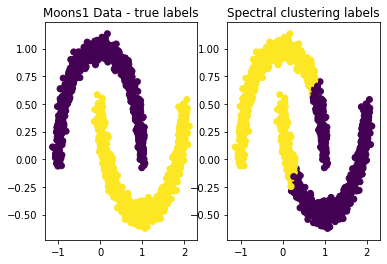

In [171]:
y_pred_spec_Moons1 = spectral.fit_predict(Moons1_X)
plt.subplot(1,2,1)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=Moons1_y)
plt.title('Moons1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c=y_pred_spec_Moons1)
plt.title('Spectral clustering labels')
plt.show()

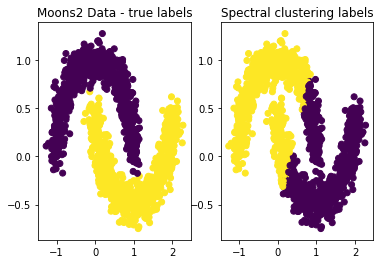

In [172]:
y_pred_spec_Moons2 = spectral.fit_predict(Moons2_X)
plt.subplot(1,2,1)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=Moons2_y)
plt.title('Moons2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c=y_pred_spec_Moons2)
plt.title('Spectral clustering labels')
plt.show()

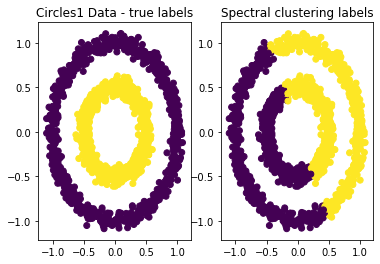

In [173]:
y_pred_spec_Circles1 = spectral.fit_predict(Circles1_X)
plt.subplot(1,2,1)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=Circles1_y)
plt.title('Circles1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c=y_pred_spec_Circles1)
plt.title('Spectral clustering labels')
plt.show()

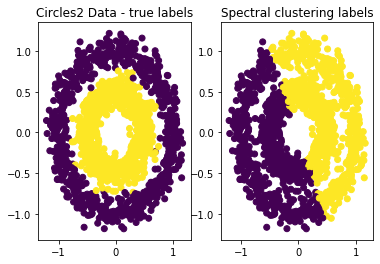

In [174]:
y_pred_spec_Circles2 = spectral.fit_predict(Circles2_X)
plt.subplot(1,2,1)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=Circles2_y)
plt.title('Circles2 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c=y_pred_spec_Circles2)
plt.title('Spectral clustering labels')
plt.show()

<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

<span style="color:green">**Answer:** </span><br />
Decreasing order of rand_index:
Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1



In [175]:
print("Blobs1 rand_index:", rand_index(Blobs1_y, y_pred_spec_Blobs1))
print("Blobs2 rand_index:", rand_index(Blobs2_y, y_pred_spec_Blobs2))
print("Moons1 rand_index:", rand_index(Moons1_y, y_pred_spec_Moons1))
print("Moons2 rand_index:", rand_index(Moons2_y, y_pred_spec_Moons2))
print("Circles1 rand_index:", rand_index(Circles1_y, y_pred_spec_Circles1))
print("Circles2 rand_index:", rand_index(Circles2_y, y_pred_spec_Circles2))

Blobs1 rand_index: 0.99911140760507
Blobs2 rand_index: 0.919189682010229
Moons1 rand_index: 0.6441263064265066
Moons2 rand_index: 0.6448441183010896
Circles1 rand_index: 0.49966733377807426
Circles2 rand_index: 0.4997553924838781


<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span><br />Yes, the rankings are consistent with my observations



### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br /> Blobs1 dataset exhibits the best clustering tendency among all the others as it is well separated. Visually examining the dataset shows us there are three clusters possible with appropriate inter-cluster distance and low intra-cluster distance. Also, there are very few noise points in the dataset making it best dataset for clustering.



<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span><br /> Among all the datasets, rand dataset is the one with least clustering tendency as it is highly unordered and has overlapping datapoints with no separation between them.<br /> Although, Moons2 and Circles2 datasets have defined clusters, they have high intra cluster variance making it difficult to cluster. Various clustering algorithms can vary the results as per the parameters chosen


<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

<span style="color:green">**Answer:** </span><br />
Decreasing order of Hopkins statistic: <br />
Blobs1 > Moons1 > Moons2 > Blobs2 > Circles1 > Circles2



In [186]:
print("Blobs1 hopkins statistic:", hopkins(Blobs1_X))
print("Blobs2 hopkins statistic:", hopkins(Blobs2_X))
print("Moons1 hopkins statistic:", hopkins(Moons1_X))
print("Moons2 hopkins statistic:", hopkins(Moons2_X))
print("Circles1 hopkins statistic:", hopkins(Circles1_X))
print("Circles2 hopkins statistic:", hopkins(Circles2_X))

Blobs1 hopkins statistic: 0.9394082368578975
Blobs2 hopkins statistic: 0.8304221355241849
Moons1 hopkins statistic: 0.9262463111416849
Moons2 hopkins statistic: 0.8930677293023502
Circles1 hopkins statistic: 0.824625134065007
Circles2 hopkins statistic: 0.7689446805410928


<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer:** </span>Yes, hopkins statistic value was high for Blobs1 followed by Moons1. My observation was pretty much consistent with 7c



<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

<span style="color:green">**Answer:** </span>K means found the nearest k datapoints and clustered them accordingly as we mentioned the number of clusters as 3. <br />Gaussian mixture model finds Gaussian distribution in the data and found 3 clusters, very similar to K means.<br />Single link finds the least distance between the datapoints while max link finds the maximum distance between the points in the clusters. Average link calculates the average pairwise distance between the points in the cluster.<br />DBSCAN finds the clusters based on the density of points not on distance. Advantage of DBSCAN is that it is not required to mention the number of clusters beforehand. The algorithm calculates them based on the datastructure, value of epsilon and min_samples chosen



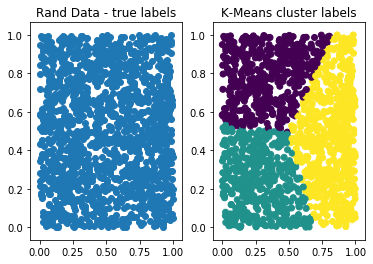

In [238]:
#KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_k = kmeans.fit_predict(Rand_X)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_k)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

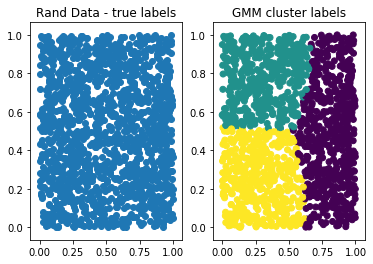

In [239]:
#Gaussian Mixture
n_clusters = 3;
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
y_pred_gmm = gmm.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1]) # true clusters
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_gmm)  # EM clusters
plt.title('GMM cluster labels')
plt.show()

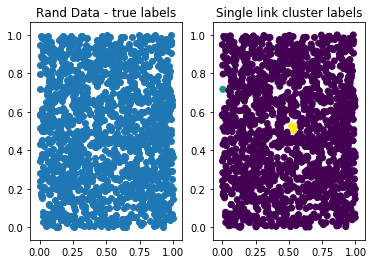

In [240]:
#Single link agglomerative clustering
n_clusters = 3
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred_sl = single_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_sl)
plt.title('Single link cluster labels')
plt.show()

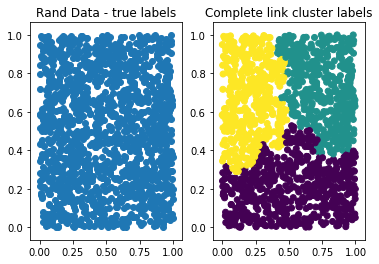

In [241]:
#Max link agglomerative clustering
n_clusters = 3
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred_ml = complete_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_ml)
plt.title('Complete link cluster labels')
plt.show()

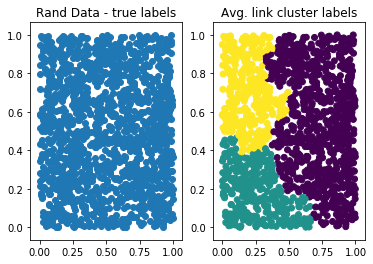

In [242]:
#Average link agglomerative clustering
n_clusters = 3
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred_al = average_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_al)
plt.title('Avg. link cluster labels')
plt.show()

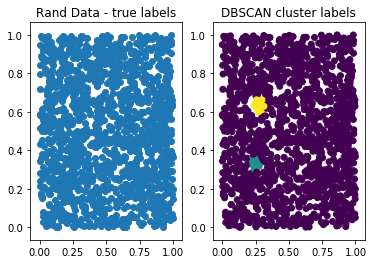

In [262]:
#DBSCAN
dbscan = DBSCAN(eps=.04, min_samples=18)
y_pred_dbscan = dbscan.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_dbscan)
plt.title('DBSCAN cluster labels')
plt.show()

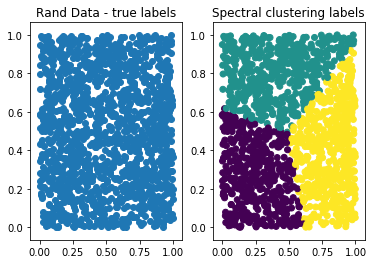

In [263]:
#Spectral CLustering
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred_spec = spectral.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred_spec)
plt.title('Spectral clustering labels')
plt.show()

### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [264]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [265]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [266]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [267]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [268]:
Cancer_X.shape

(569, 30)

In [269]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [270]:
score = np.zeros(41);
for i in range(2,41):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Cancer_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Cancer_X)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for k= 38 : 1496563.45
SSE for k

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

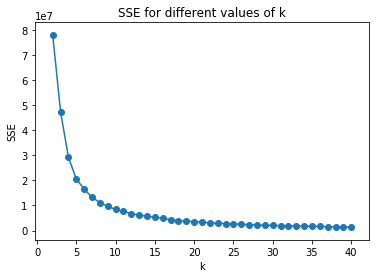

In [271]:
plt.plot(range(2,41),score[2:41])
plt.scatter(range(2,41),score[2:41])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:** </span> <br /> Beyond 5 there is no significant reduction in SSE. Hence I choose k=5



<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

Score: 20539877.62210296


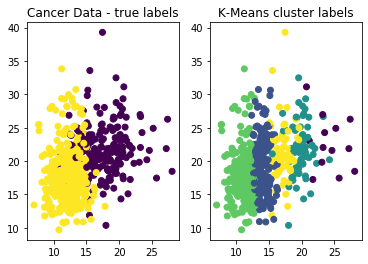

In [272]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_cancer = kmeans.fit_predict(Cancer_X)
score = -kmeans.score(Cancer_X)
print("Score:", score)
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=Cancer_y) # true clusters
plt.title('Cancer Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Cancer_X[:, 0], Cancer_X[:, 1], c=y_pred_cancer)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

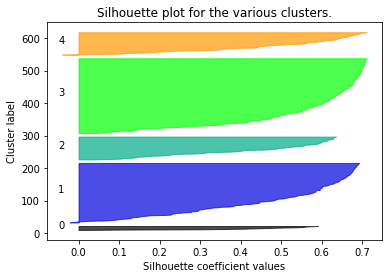

In [273]:
silhouette(Cancer_X,y_pred_cancer)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer:** </span><br /> Cluster with label 4 is a good cluster followed by 3 and 1. Cluster 2 stands in 4th position while 0 is a not so good cluster. <br /> 4 > 3 > 1 > 2 > 0



<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [58]:
print("Cancer rand_index:", rand_index(Cancer_y, y_pred_cancer))

Cancer rand_index: 0.6625473402807001


<span style="color:green">**Answer:** </span><br /> Based on the value of rand-index, it can be said that clustering is above average but not perfect. K means generated not only few well separated clusters biut also some unordered and widely separated clusters



<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

Cluster matrix:
[[1. 1. 1. 2. 1.]
 [2. 2. 1. 1. 1.]
 [1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


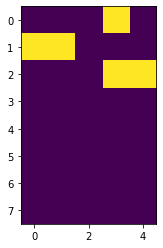

In [274]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

eps=[50, 100, 150, 200, 250, 300, 400, 500]
min_samples=[10, 15, 20, 25, 30]
len_eps=len(eps)
len_min_sam=len(min_samples)
cluster_matrix=np.zeros((len_eps,len_min_sam))
for i in range(len_eps):
    for j in range(len_min_sam):
        dbscan = DBSCAN(eps=eps[i], min_samples=min_samples[j])
        y_pred = dbscan.fit_predict(Cancer_X)
        cluster_matrix[i][j]=max(y_pred)+1
        #print(cluster_matrix)
print("Cluster matrix:")
print(cluster_matrix)
plt.imshow(cluster_matrix)
plt.show()

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

Noise matrix:
[[187. 195. 206. 220. 262.]
 [ 56. 100. 143. 148. 158.]
 [ 27.  34.  41.  62.  96.]
 [ 20.  21.  25.  31.  31.]
 [ 18.  20.  20.  22.  22.]
 [ 12.  15.  19.  20.  21.]
 [ 11.  11.  11.  13.  13.]
 [  5.   8.   8.  11.  11.]]


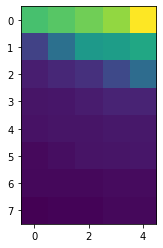

In [275]:
eps=[50, 100, 150, 200, 250, 300, 400, 500]
min_samples=[10, 15, 20, 25, 30]
len_eps=len(eps)
len_min_sam=len(min_samples)
noise_matrix=np.zeros((len_eps,len_min_sam))
for i in range(len_eps):
    for j in range(len_min_sam):
        dbscan = DBSCAN(eps=eps[i], min_samples=min_samples[j])
        y_pred = dbscan.fit_predict(Cancer_X)
        noise_matrix[i][j]=sum(y_pred==-1)

print("Noise matrix:")
print(noise_matrix)              
plt.imshow(noise_matrix)
plt.show()

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:** </span><br />Based on the matrix deduced in 8g and 8h, we can see that there are two clusters formed when eps is chosen as 100 or 150. In this case, clustering can be made efficiently as maximum number of points can be included in the cluster. Depending on the value of eps and min_samples chosen, there are either 1 or 2 clusters in the Cancer dataset. The datapoints could be close to one another with slight distance between the possible 2 clusters



<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

In [112]:
dbscan= DBSCAN(eps=100, min_samples=10) 
y_pred = dbscan.fit_predict(Cancer_X) 
y_pred[y_pred==-1]=10
print("Rand_index when eps is 100:",rand_index(Cancer_y,y_pred))

Rand_index when eps is 100: 0.6680115844451595


In [113]:
dbscan= DBSCAN(eps=150, min_samples=10) 
y_pred = dbscan.fit_predict(Cancer_X) 
y_pred[y_pred==-1]=10
print("Rand_index when eps is 150:",rand_index(Cancer_y,y_pred))

Rand_index when eps is 150: 0.5603851580484666


<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer:** </span><br /> Although both K-Means and DB Scan generated almost same rand index, it can be said that k-means clustering works well for this data as it created more number of clusters than dbscan making it convenient

